In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!mkdir 128

In [2]:
from google.colab import files

files.upload()

Saving Train_0.png to Train_0.png


{'Train_0.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x80\x00\x00\x00\x80\x08\x00\x00\x00\x00\xe6U>\x17\x00\x00\x0b\xabIDATx\x01\xc5\xc1\x0bXT\x05\xde\x07\xe0\xdf\xff\x9c\xb9\x0f\xc3\x80"\x04\x08\xca%\xd40K\xf1\x8a\xad\xa2f\x9a\xb6x\xcd\xecf\x85%*\xe1\x9a)n\xab\x91%\xfa\x94>\xde\xb3\xf2S\xbf]K[I3L\xc4\xbb\xae\xbaj\x9a`"\x85\x82\t"7AF\x18`\xae\x9cs6o\xc9\x0c\x9ci\x9c|\x9e\xf3\xbe\x04\x89\x11$F\x90\x18Ab\x04\x89\x11$F\x90\x18Ab\x04\x89\x11$F\x90\x18Ab\x04\x89\x11$F\x90\x18Ab\x04\x89\x11$F\x90\x18Ab\x04\x89\x11$F\x90\x18Ab\x04\x8f)\xf4Z\xb9\x82\x11\xb8\xa6F\xb3\xd5\x04O\x11<\xa6\x8c\xee\xf1X\x97@%g\xaf5\x14\x9d*\xbeV\x05\x8f\x10\xfe\x84\xc0\xf0\xc0\xa7\xa3\xbd\xbcH\xc6X\xaf\x1e\xcb9^\x07\x0f\x10\xfe\x84\xc06\xbf\x0e\xea\x17\xfe\xa8^\xc6\t*\xcb\xf5\x13;O\xe3\xc1\x11\xfe\x9c\x1e2.\xa6\x7f\xa4F!\'[C\xc1\x9e\x9d\x8dxP\x84?G&p\xb2\x81\x91\xda\xb0 \x85\x82UV\xaf=\x84\x07Ex\x18\xb4}\xc3\xf0x\xa8V\xb6\xfd3\xb4\xa0\xb0\xc1\x15\x82\x88G{\xdb2\xcdp\x17A\xf9\xfe0\xbbq\xf7j8\x1b\x16\xf0C\x

In [0]:
!cp '/content/drive/My Drive/kaggle/bengali/input/grapheme-imgs-128x128.zip' ./

In [0]:
!cp '/content/drive/My Drive/kaggle/bengali/input/train.csv' ./

In [0]:
!cp '/content/drive/My Drive/kaggle/bengali/output/m_mishdense_eps16_sr01_bs32_adam_iafossheads.h5' ./

In [0]:
!unzip grapheme-imgs-128x128.zip  -d 128

In [0]:
!ls

128  drive  grapheme-imgs-128x128.zip  sample_data  Train_0.png  train.csv


In [0]:
%tensorflow_version 2.x

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from tqdm.auto import tqdm

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input/m*'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [0]:
train_df_ = pd.read_csv('train.csv')
Train_dir='128'
#test_df_ = pd.read_csv('/kaggle/input/bengaliai-cv19/test.csv')
#class_map_df = pd.read_csv('/kaggle/input/bengaliai-cv19/class_map.csv')

In [0]:
#class_map_df

In [0]:
dataset_np = train_df_.to_numpy()
dataset_np[:,0]+='.png'
dataset_m = train_df_.shape[0]
train_m = dataset_m
train_np = dataset_np
train_df = pd.DataFrame(train_np)
train_df.rename(columns={0:'filename',1:'root_class',2:'vowel_class',3:'cons_class', 4:'grapheme'}, inplace=True)

In [0]:
class Mish(Activation):
    '''
    Mish Activation Function.
    .. math::
        mish(x) = x * tanh(softplus(x)) = x * tanh(ln(1 + e^{x}))
    Shape:
        - Input: Arbitrary. Use the keyword argument `input_shape`
        (tuple of integers, does not include the samples axis)
        when using this layer as the first layer in a model.
        - Output: Same shape as the input.
    Examples:
        >>> X = Activation('Mish', name="conv1_act")(X_input)
    '''

    def __init__(self, activation, **kwargs):
        super(Mish, self).__init__(activation, **kwargs)
        self.__name__ = 'Mish'


def mish(inputs):
    return inputs * tf.math.tanh(tf.math.softplus(inputs))

get_custom_objects().update({'Mish': Mish(mish)})

In [0]:
model = \
load_model('m_mishdense_eps16_sr01_bs32_adam_iafossheads.h5',
                    custom_objects={'mish':Mish(mish)}, compile=False)

In [0]:
train_datagen = ImageDataGenerator()

In [0]:
columns=["root_class","vowel_class", "cons_class"]
batch_size = 512
train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory=Train_dir,
        x_col="filename",
        y_col=columns,
        target_size=(128, 128),
        batch_size=batch_size,
        class_mode="multi_output",
        colormode="greyscale",
        shuffle=False)

Found 200840 validated image filenames.


In [0]:
def split_into_3_outputs(y_batch):
    y1=tf.keras.utils.to_categorical(y_batch[0],168)
    y2=tf.keras.utils.to_categorical(y_batch[1],11)
    y3=tf.keras.utils.to_categorical(y_batch[2],7)
    
    return y1,y2,y3

In [0]:
def aux_data_gen(generator):
    stats = (0.0692, 0.2051)
    while True:
        batch = next(generator)
        batch_x = (batch[0].astype(np.float32)/255.0 - stats[0])/stats[1]
        yield batch_x, split_into_3_outputs(batch[1])

In [0]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
batch = next(aux_data_gen(train_generator))

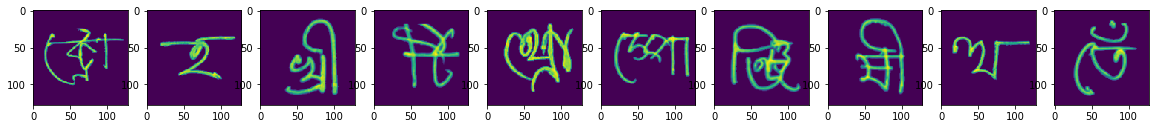

In [0]:
fig, axs = plt.subplots(1, 10, figsize=(20,20))
for i in range(10):
    axs[i].imshow(batch[0][i][:,:,0])

In [0]:
num_batches = dataset_m//batch_size+1
print("num_batches",num_batches)

cm0 = np.zeros((168,168),dtype=int)
cm1 = np.zeros((11,11),dtype=int)
cm2 = np.zeros((7,7), dtype=int)
batch_pred_generator=aux_data_gen(train_generator)

for i in tqdm(range(num_batches)):
    batch = next(batch_pred_generator)
    predict=model.predict(batch[0])
    
    pred_y0=predict[0]
    pred_y1=predict[1]
    pred_y2=predict[2]
    
    true_y0=batch[1][0]
    true_y1=batch[1][1]
    true_y2=batch[1][2]
    
    pred_y2_max=np.argmax(pred_y2, axis=1)
    true_y2_max=np.argmax(true_y2, axis=1)

    pred_y1_max=np.argmax(pred_y1, axis=1)
    true_y1_max=np.argmax(true_y1, axis=1)

    pred_y0_max=np.argmax(pred_y0, axis=1)
    true_y0_max=np.argmax(true_y0, axis=1)
    
    cm0 += confusion_matrix(true_y0_max, pred_y0_max, labels=list(np.arange(cm0.shape[0])))
    cm1 += confusion_matrix(true_y1_max, pred_y1_max, labels=list(np.arange(cm1.shape[0])))
    cm2 += confusion_matrix(true_y2_max, pred_y2_max, labels=list(np.arange(cm2.shape[0])))

    

num_batches 393


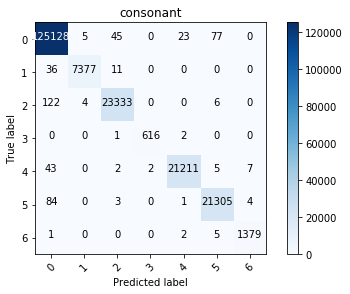

In [0]:
plot_confusion_matrix(cm2, title='consonant',classes = range(true_y2.shape[1])) 

In [0]:
cm1.sum()

200840

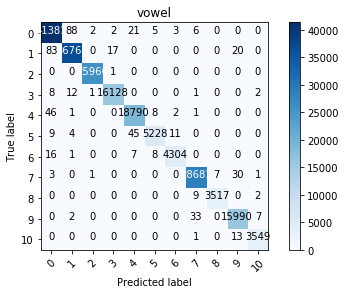

In [0]:
plot_confusion_matrix(cm1, title='vowel',classes = range(true_y1.shape[1])) 

In [0]:
numpy.savetxt("/content/drive/My Drive/kaggle/bengali/output/cm0.csv", cm0, delimiter=",")

In [0]:
numpy.savetxt("/content/drive/My Drive/kaggle/bengali/output/cm1.csv", cm1, delimiter=",")
numpy.savetxt("/content/drive/My Drive/kaggle/bengali/output/cm2.csv", cm2, delimiter=",")

In [0]:
!pip install pycm==2.5

     |████████████████████████████████| 61kB 1.9MB/s 
     |████████████████████████████████| 522kB 7.6MB/s 
     |████████████████████████████████| 235kB 53.2MB/s 
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.0.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.0.1 which is incompatible.
  Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1


In [0]:
from pycm import *

In [0]:
cm0[39][30:40]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0, 617])

In [0]:
for i in range(168):
  for j in range(168):
    if i!=j and cm0[i][j]>20: print(i,j,cm0[i][j])

59 81 22
60 83 46
61 84 48
62 85 39
83 60 33
84 61 37
85 62 22
141 149 23
162 18 22


(128, 128, 3)
(128, 128)


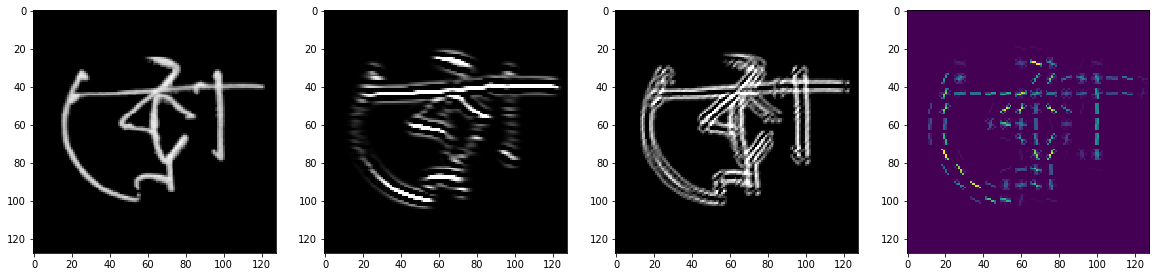

In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog

# cv2.getGaborKernel(ksize, sigma, theta, lambda, gamma, psi, ktype)
# ksize - size of gabor filter (n, n)
# sigma - standard deviation of the gaussian function
# theta - orientation of the normal to the parallel stripes
# lambda - wavelength of the sunusoidal factor
# gamma - spatial aspect ratio
# psi - phase offset
# ktype - type and range of values that each pixel in the gabor kernel can hold

g_kernel1 = cv2.getGaborKernel((8,8),2,np.pi/12, 1, 1, 0, ktype=cv2.CV_32F)
g_kernel2 = cv2.getGaborKernel((4,4),8,np.pi/4, 1, 1, 0, ktype=cv2.CV_32F)



img = cv2.imread('Train_0.png')
print(img.shape)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
filtered_img1 = cv2.filter2D(img, cv2.CV_8UC3, g_kernel1)
filtered_img2 = cv2.filter2D(img, cv2.CV_8UC3, g_kernel2)

fd, hog_image = hog(img[:,:,0], orientations=8, pixels_per_cell=(8,8),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)

img2=np.dot(img[:,:,0],img[:,:,0].T)

print(hog_image.shape)

fig, axs = plt.subplots(1, 4, figsize=(20,20))
axs[0].imshow(img)
axs[1].imshow(filtered_img1)
axs[2].imshow(filtered_img2)
axs[3].imshow(hog_image)
